# Import Libraries
Import necessary libraries including NumPy, Matplotlib, scikit-learn for data, pickle for model saving/loading, networkx for visualization, and tqdm for progress tracking.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Activation Functions Implementation
Implement activation function classes including the base Activation class, Linear, ReLU, Sigmoid, Tanh, and Softmax, each with forward and derivative methods.

# Loss Functions Implementation
Implement loss function classes including the base Loss class, MSE (Mean Squared Error), BinaryCrossEntropy, and CategoricalCrossEntropy, each with forward and derivative methods.

# Weight Initializers Implementation
Implement weight initializer classes including the base Initializer class, ZeroInitializer, UniformInitializer, and NormalInitializer.

# Layer Implementation
Implement the Layer class with forward and backward propagation methods, weight initialization, and gradient updates.

# FFNN Model Implementation
Implement the Feedforward Neural Network (FFNN) class with methods for creating the network, forward and backward propagation, weight updates, training, and prediction.

# Training and Evaluation on Dataset
Load the dataset, preprocess it for classification, and train the FFNN model with appropriate hyperparameters. Evaluate model performance using accuracy metrics.

In [2]:
# Import self-defined libraries
from activation import Linear, ReLU, Sigmoid, Tanh, Softmax
from loss import MeanSquaredError, BinaryCrossEntropy, CategoricalCrossEntropy
from initialization import ZeroInitialization, UniformInitialization, NormalInitialization, XavierInitialization, HeInitialization
from model import FFNN

### Load Dataset & Data Preparation

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Onehot buat label
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

Epoch 1/10


100%|██████████| 56000/56000 [00:03<00:00, 18055.25it/s, train_loss=0.5446, val_loss=0.2976]


Epoch 2/10


100%|██████████| 56000/56000 [00:02<00:00, 19071.19it/s, train_loss=0.2550, val_loss=0.2456]


Epoch 3/10


100%|██████████| 56000/56000 [00:03<00:00, 18125.09it/s, train_loss=0.2066, val_loss=0.2211]


Epoch 4/10


100%|██████████| 56000/56000 [00:02<00:00, 22271.12it/s, train_loss=0.1784, val_loss=0.2013]


Epoch 5/10


100%|██████████| 56000/56000 [00:03<00:00, 17237.11it/s, train_loss=0.1583, val_loss=0.1930]


Epoch 6/10


100%|██████████| 56000/56000 [00:02<00:00, 20961.77it/s, train_loss=0.1428, val_loss=0.1871]


Epoch 7/10


100%|██████████| 56000/56000 [00:03<00:00, 18319.82it/s, train_loss=0.1304, val_loss=0.1834]


Epoch 8/10


100%|██████████| 56000/56000 [00:02<00:00, 18797.56it/s, train_loss=0.1200, val_loss=0.1813]


Epoch 9/10


100%|██████████| 56000/56000 [00:03<00:00, 16837.97it/s, train_loss=0.1103, val_loss=0.1731]


Epoch 10/10


100%|██████████| 56000/56000 [00:03<00:00, 17772.76it/s, train_loss=0.1027, val_loss=0.1707]


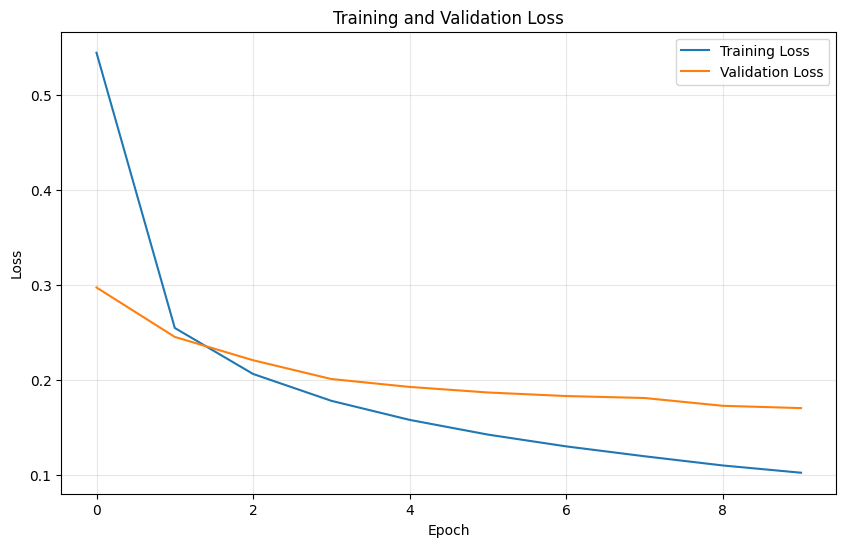

Test accuracy: 0.9530


In [4]:
layer_sizes = [784, 32, 16, 10]  # 784 fitur input

activations = [
    ReLU(),
    ReLU(), 
    Softmax()     
]

loss_function = CategoricalCrossEntropy()

initializations = [
    HeInitialization(seed=42),  
    XavierInitialization(seed=42),  
    HeInitialization(seed=42)   
]

model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss=loss_function,
    initializations=initializations
)

history = model.train(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    x_y_val=(X_test, y_test),
    verbose=1
)

# plot loss
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# prediksi
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy = np.mean(y_pred_classes == y_true_classes)
print(f"Test accuracy: {accuracy:.4f}")

# Model Visualization
Implement visualization of model architecture, training history, weight distributions, and gradient distributions using matplotlib and networkx.

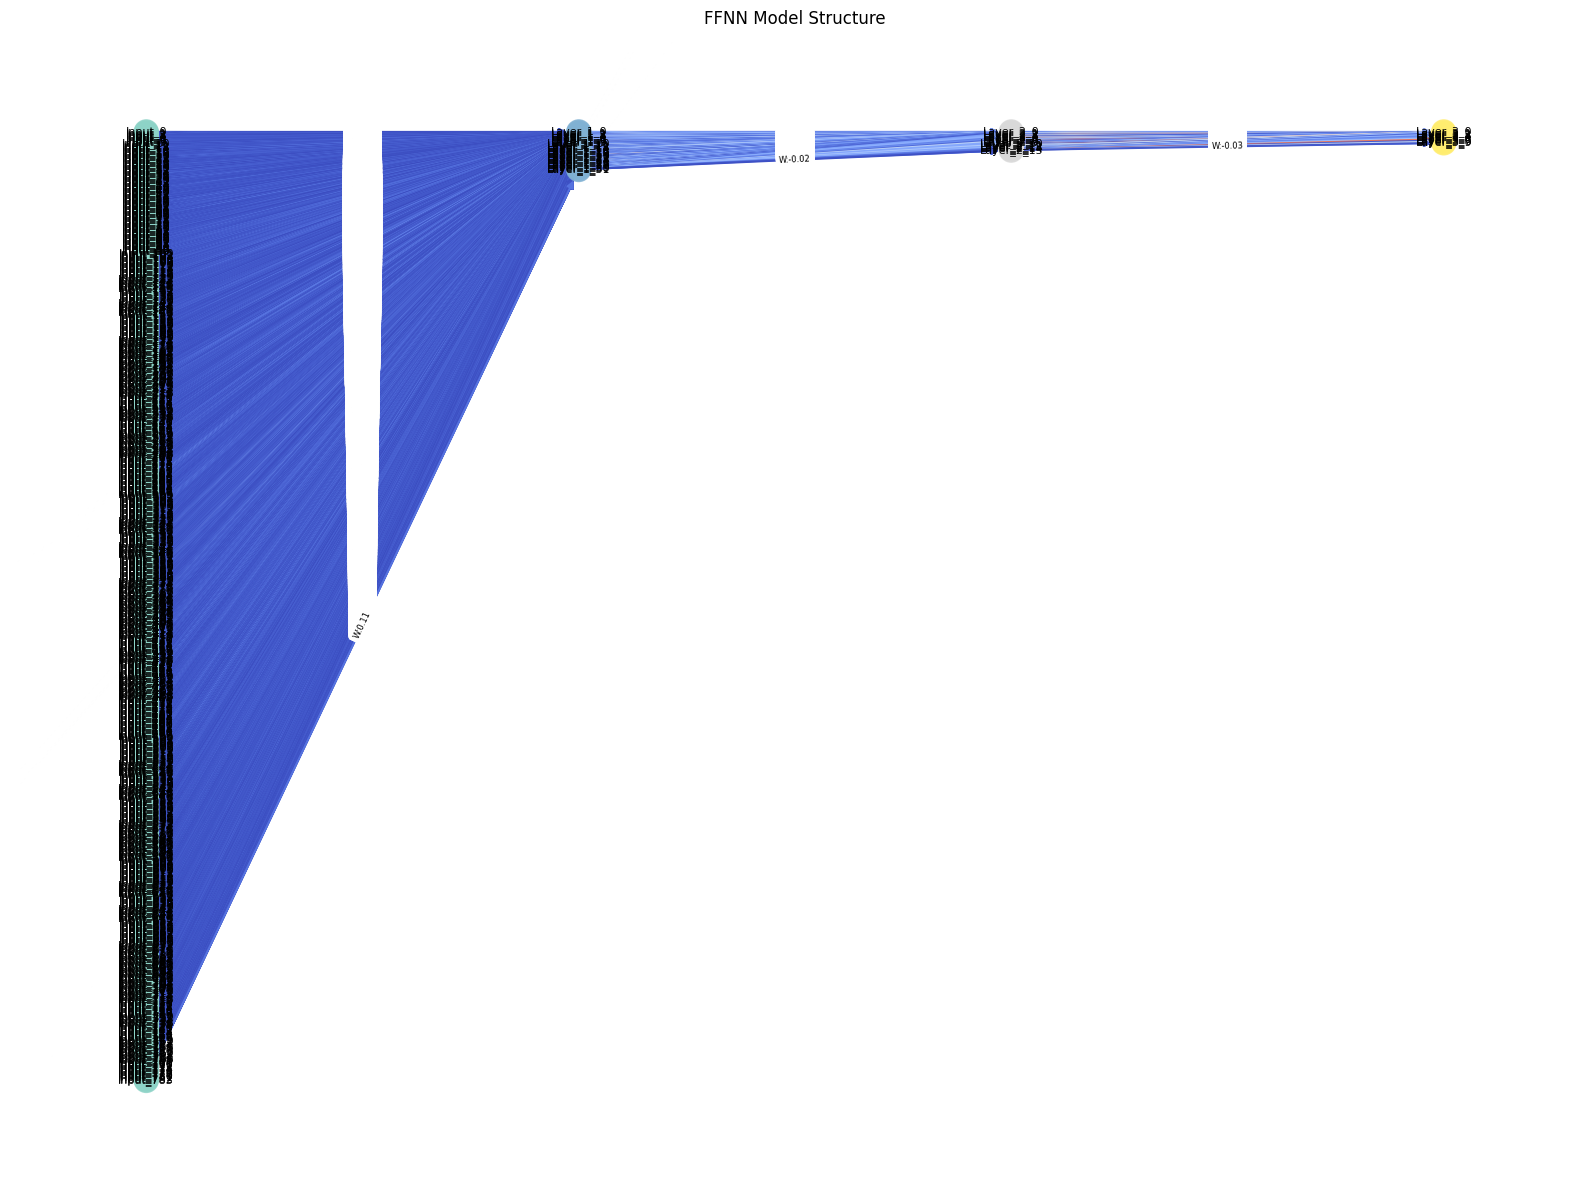

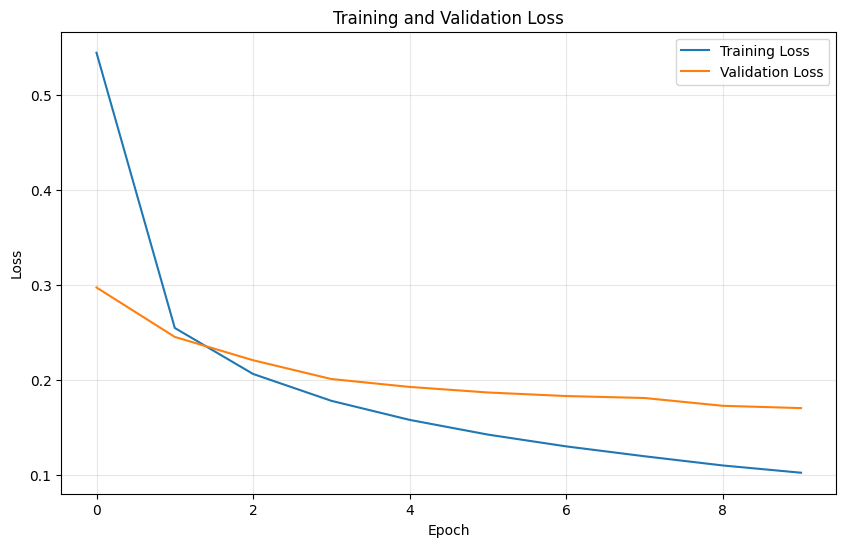

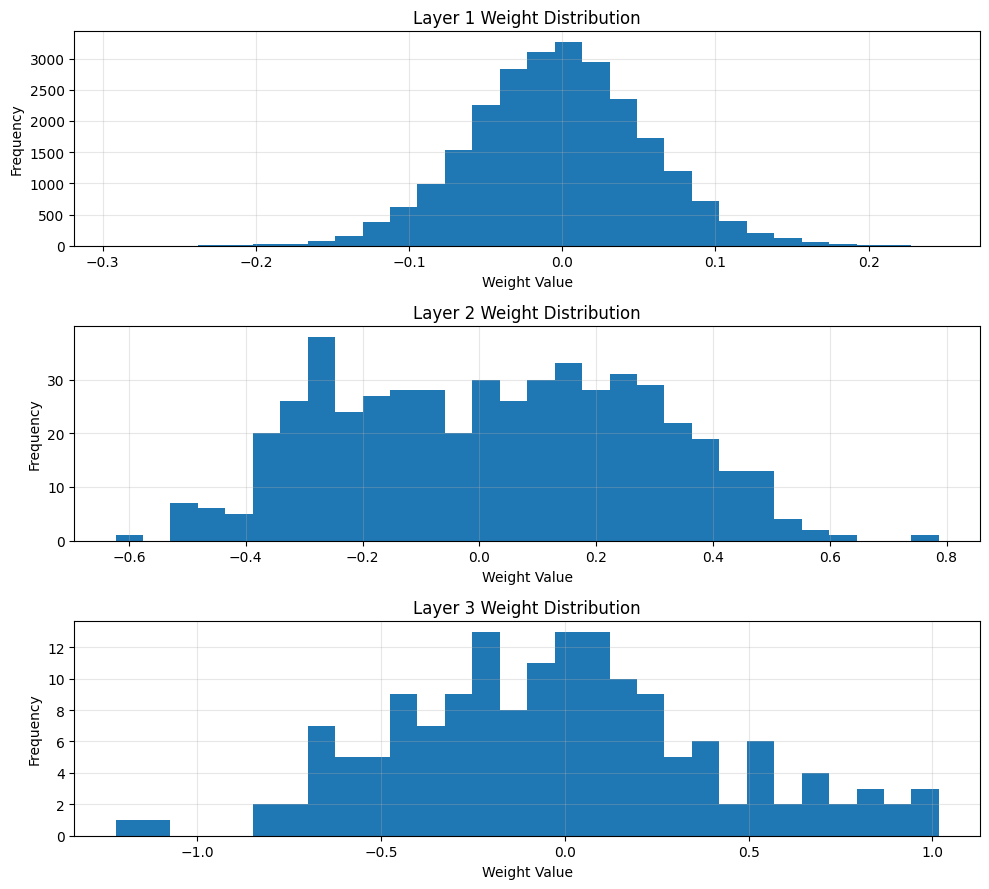

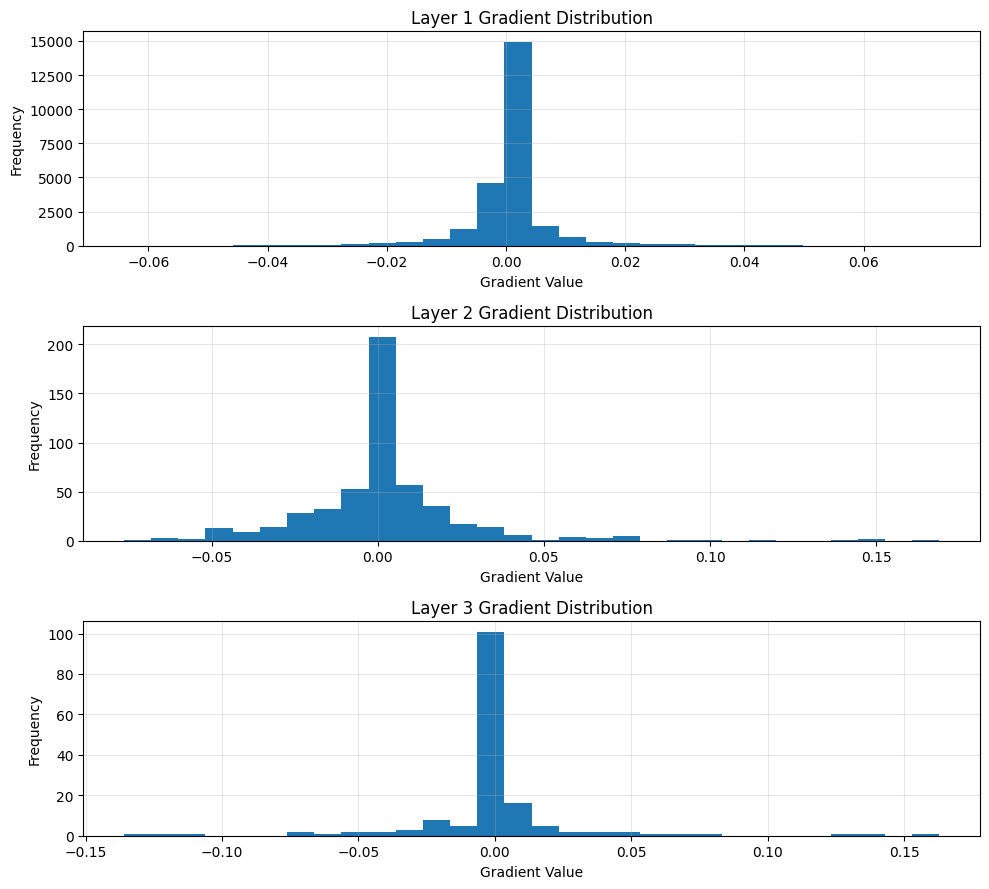

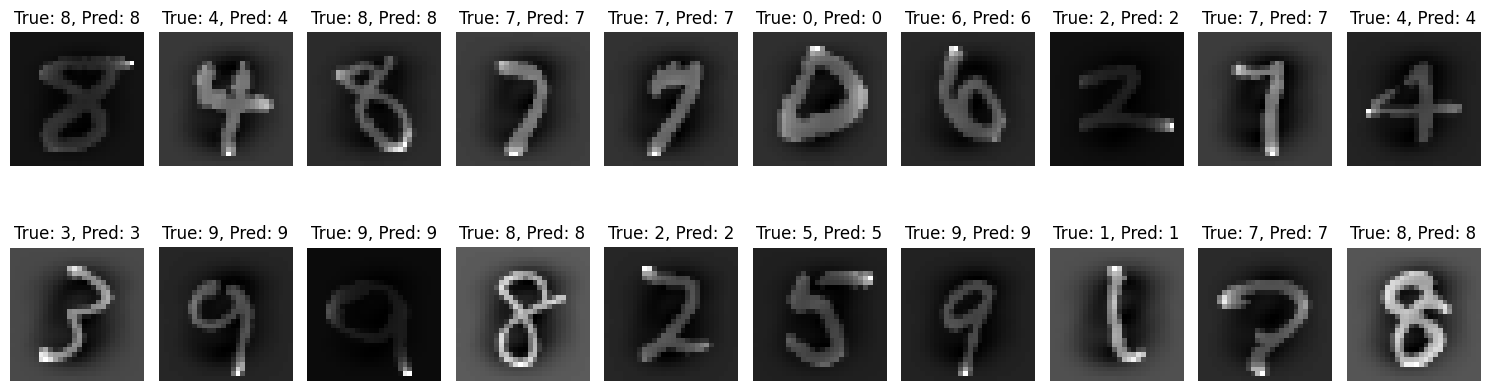

In [5]:
# Visualize the model architecture
model.plot_model()

# Plot the training history
plt.figure(figsize=(10, 6))
plt.plot(history['train_loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot the weight distributions for all layers
model.plot_weight_distribution()

# Plot the gradient distributions for all layers
model.plot_gradient_distribution()

# contoh hasil prediksi 20 data:
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true_classes[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Save and Load Model
Demonstrate saving the trained model to disk and loading it back, then verify the loaded model produces identical predictions.

In [6]:
# Save the trained model to a file
model.save("ffnn_model.pkl")

# Load the model from the file
loaded_model = FFNN.load("ffnn_model.pkl")

# Verify that the loaded model produces identical predictions
y_pred_original = model.predict(X_test)
y_pred_loaded = loaded_model.predict(X_test)

# Check if predictions are identical
identical_predictions = np.allclose(y_pred_original, y_pred_loaded)
print(f"Are predictions identical? {'Yes' if identical_predictions else 'No'}")

# Calculate accuracy for the loaded model
y_pred_loaded_classes = np.argmax(y_pred_loaded, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
accuracy_loaded = np.mean(y_pred_loaded_classes == y_true_classes)
print(f"Test accuracy (loaded model): {accuracy_loaded:.4f}")

Are predictions identical? Yes
Test accuracy (loaded model): 0.9530
